Выполнить непрерывное вейвлет- преобразование (НВП) ряда.
Выбрать сечение вейвлет-спектра, где наилучшим образом видны локальные особенности ряда.
Объяснить.

In [1]:
import os
import numpy as np
import pandas as pd
import pylab as mpl

import pywt

from scipy import signal
from pylab import rcParams

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline

In [2]:
data = pd.read_table('data/asteroid_data.dat',sep=" ", header=None).drop(2,axis=1)
data.columns = ['time','value']
print(data.shape)

(20182, 2)


In [3]:
# x = data.value.values
rcParams['figure.figsize'] = 20, 10

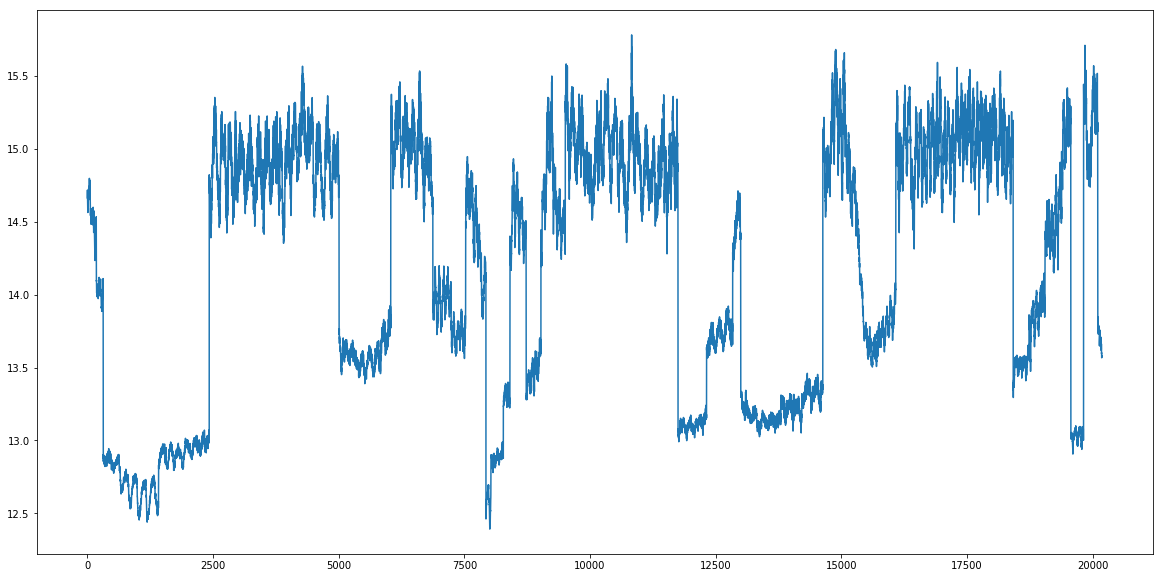

In [4]:
n = len(data.value.values)
fig, ax = plt.subplots()
ax.plot(data.value.values[:n])

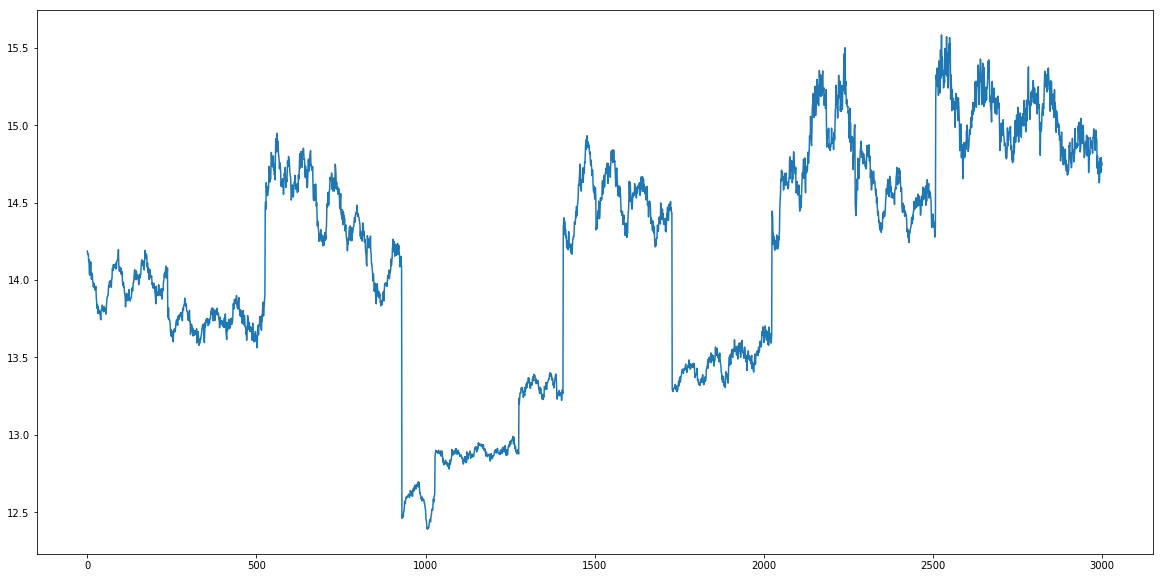

In [5]:
# n = len(data.value.values)
fig, ax = plt.subplots()
ax.plot(data.value.values[7000:10000])

In [6]:
import wv

In [16]:
def plots(cwt,a=None,b=None):
    fig = mpl.figure(1)
    # 2-d coefficient plot
    ax = mpl.axes([0.,0.1,0.55,0.4])
    mpl.xlabel('Time [s]')
    plotcwt = np.clip(np.fabs(cwt.real), 0., 1000.)
    
    if plotpower2d: 
        plotcwt = pwr
    im = mpl.imshow(plotcwt, cmap=mpl.cm.hot,extent=[x[0],x[-1],y[-1],y[0]],aspect='auto')
    #colorbar()
    if scaling=="log": 
        ax.set_yscale('log')
    mpl.ylim(y[0],y[-1])
    ax.xaxis.set_ticks(np.arange(Nlo*1.0,(Nhi+1)*1.0,100.0))
    ax.yaxis.set_ticklabels(["",""])
    theposition = mpl.gca().get_position()

    # data plot
    ax2 = mpl.axes([0.,0.54,0.55,0.3])
    if a and b:
        mpl.ylabel('Срез исходных данных, значения: с ' + str(a) + ' по ' + str(b))
    else:
        mpl.ylabel('Data')
    pos = ax.get_position()
    mpl.plot(x,A,'b-')
    mpl.xlim(Nlo*1.0,Nhi*1.0)
    ax2.xaxis.set_ticklabels(["",""])
    mpl.text(0.5,0.9,"Непрерывное вейвлет-преобразование",
    fontsize=14,bbox=dict(facecolor='green',alpha=0.2),
    transform = fig.transFigure,horizontalalignment='center')

    mpl.show()

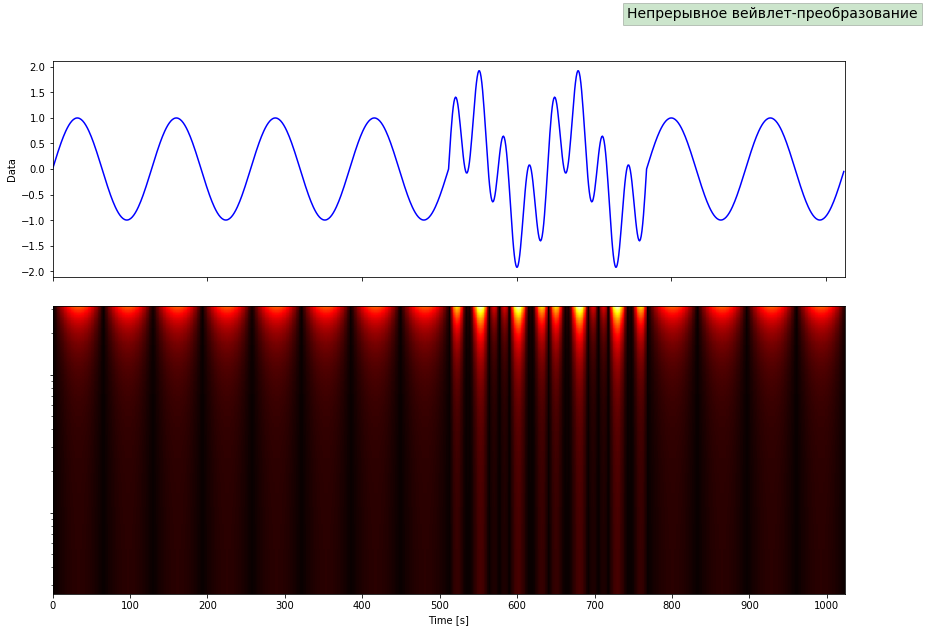

In [17]:
# Пример с простыми синусоидами

wavelet = wv.Morlet

maxscale = 4
notes = 16
scaling = "log" #or "linear"
plotpower2d = False

rcParams['figure.figsize'] = 20, 10 # размеры изображения

Ns = 1024
#limits of analysis
Nlo = 0 
Nhi = Ns
# синусоиды с периодами 128 и 32
x = np.arange(0.0,1.0*Ns,1.0)
A = np.sin(2.0*np.pi*x/128.0)
B = np.sin(2.0*np.pi*x/32.0)
A[512:768] += B[0:256]

cw = wavelet(A, maxscale, notes, scaling = scaling)

scales = cw.getscales()     
cwt = cw.getdata()

# power spectrum
pwr = cw.getpower()
scalespec = np.sum(pwr,axis=1)/scales # calculate scale spectrum
# scales
Nhi = len(A)
y = cw.fourierwl*scales
x = np.arange(Nlo*1.0,Nhi*1.0,1.0)


plots(cwt)

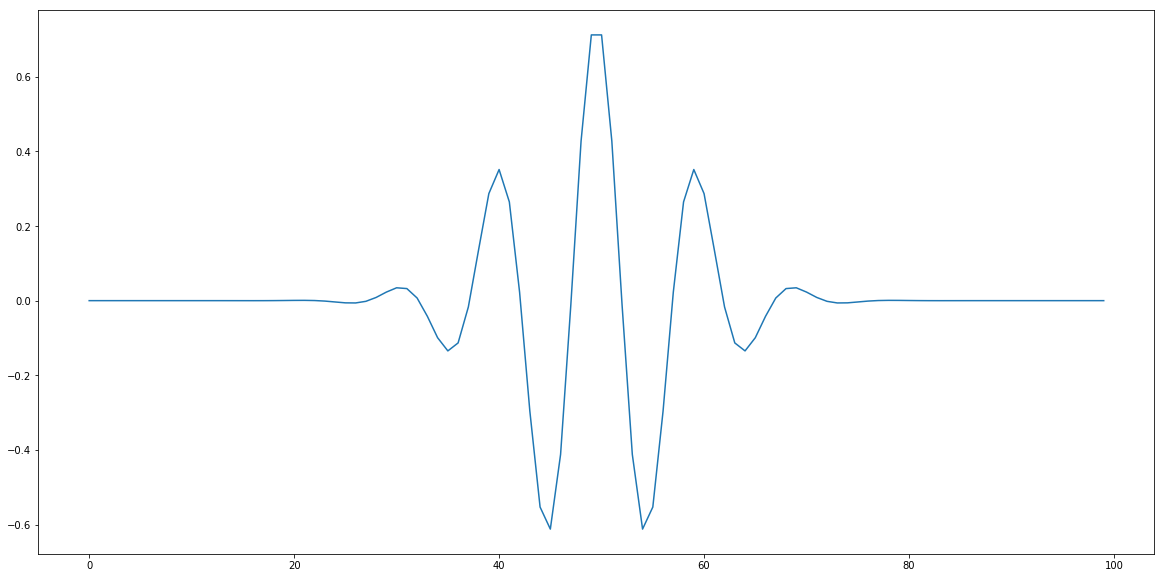

In [18]:
# просто вейвел Морле
# signal.morlet??

morlet = signal.morlet(100, w=5,s=1)

fig, ax = plt.subplots()
ax.plot(morlet)

In [19]:
rcParams['figure.figsize'] = 10, 10

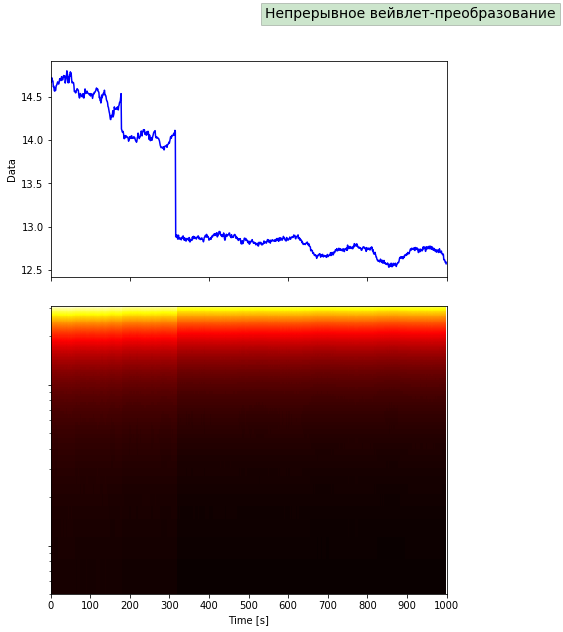

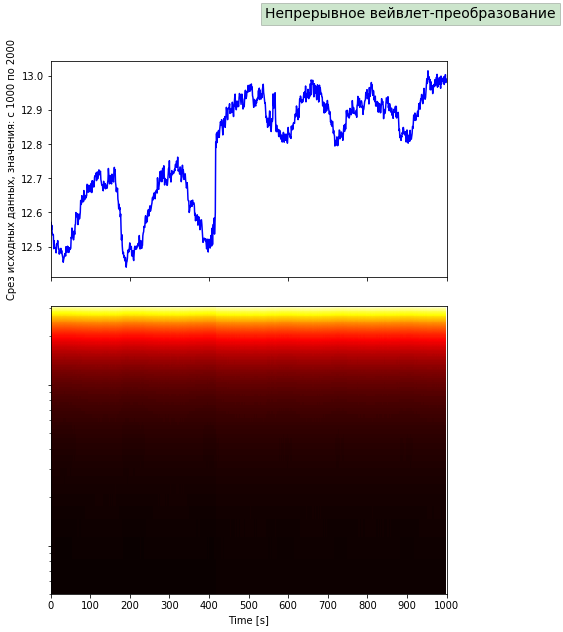

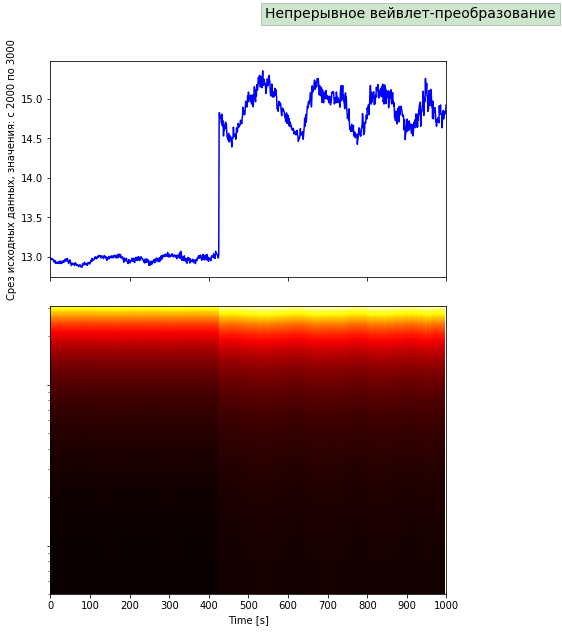

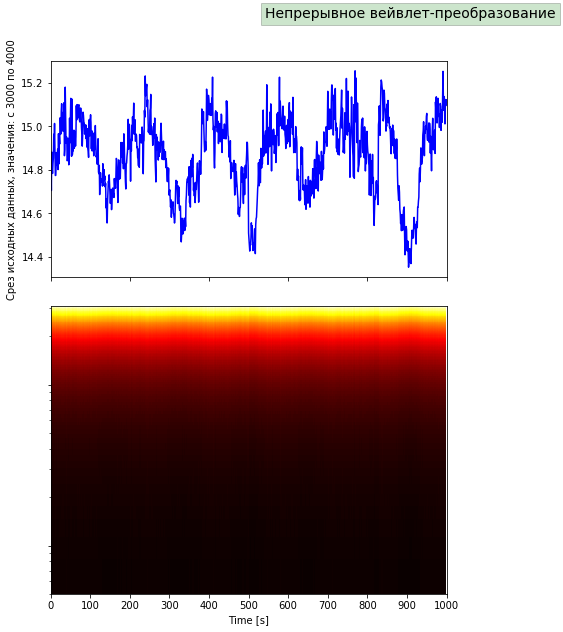

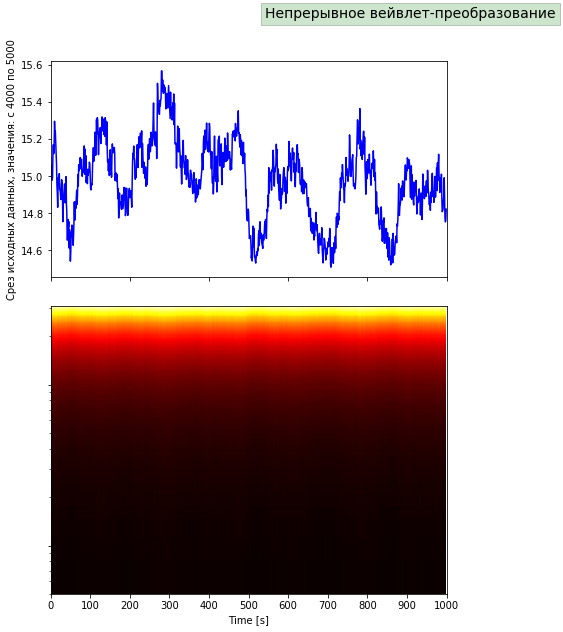

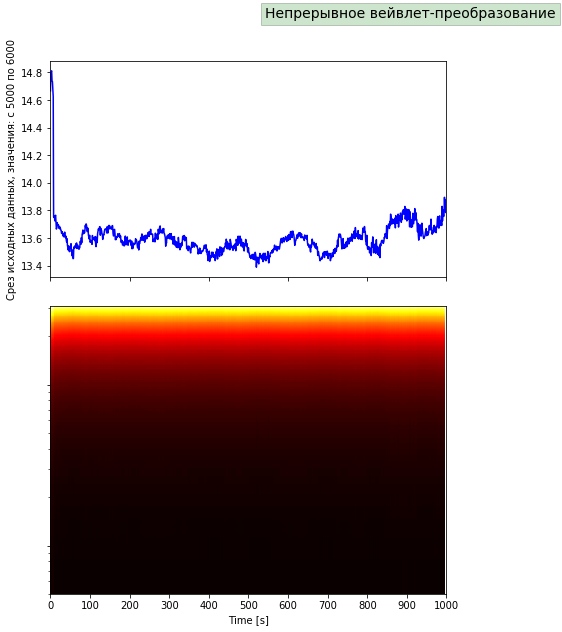

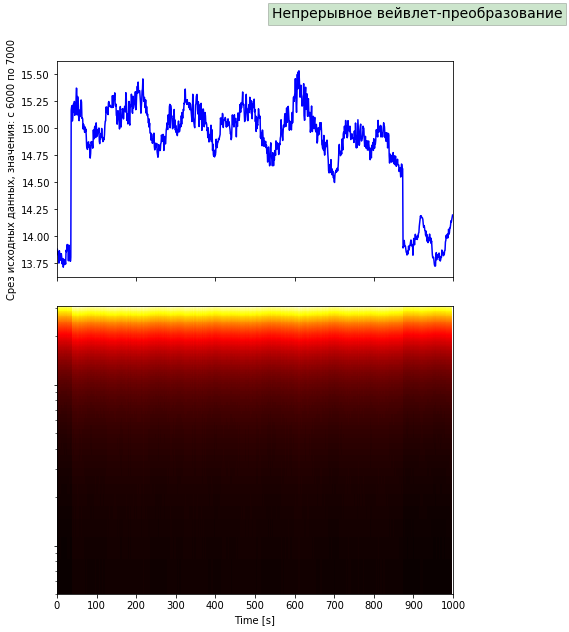

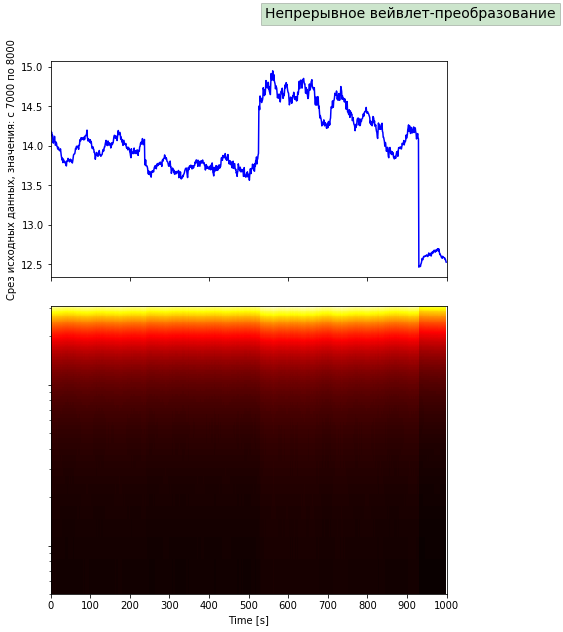

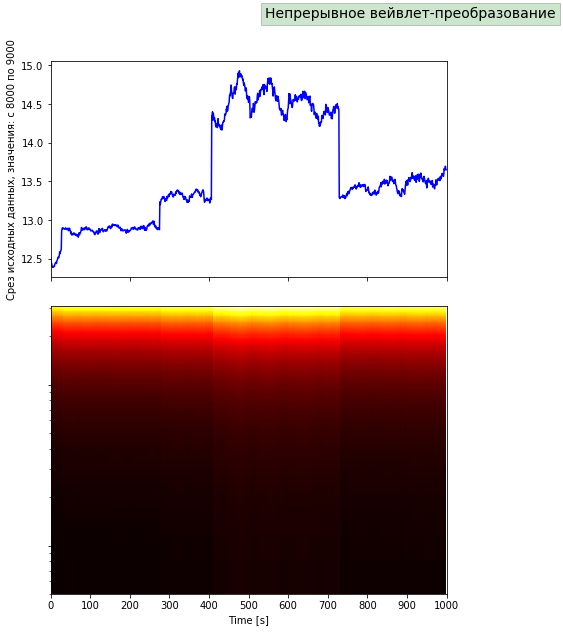

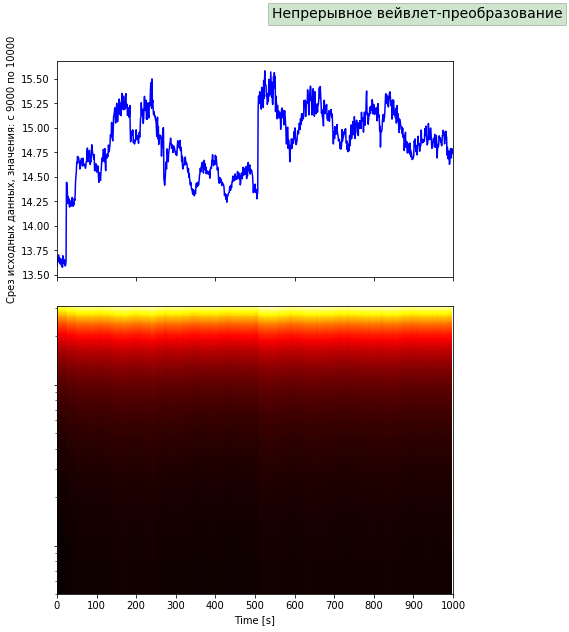

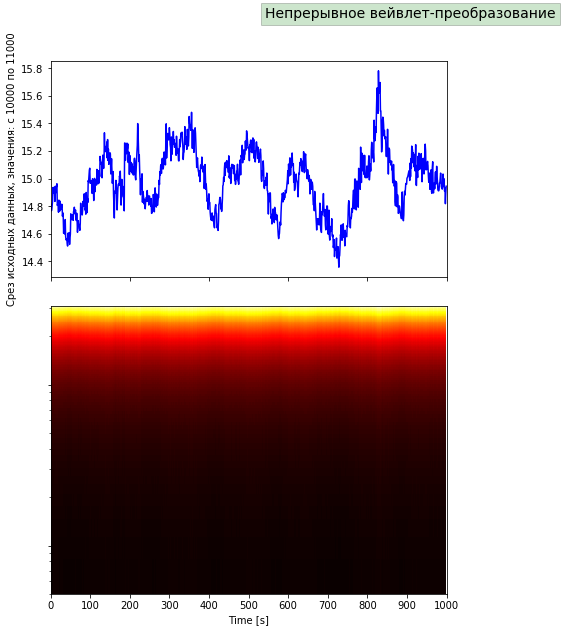

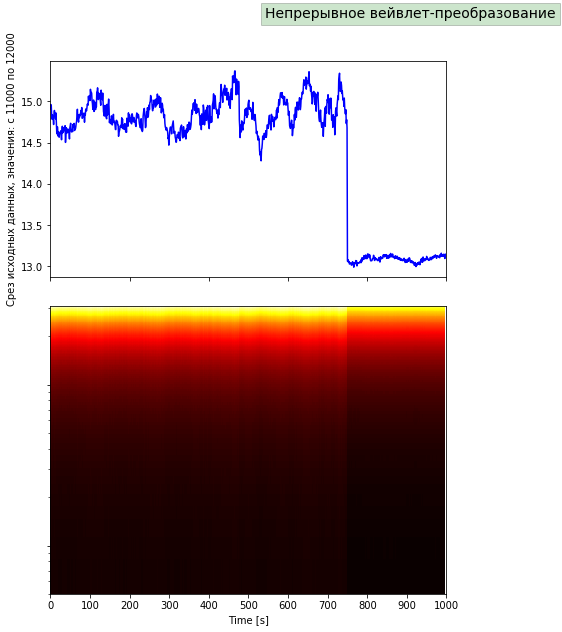

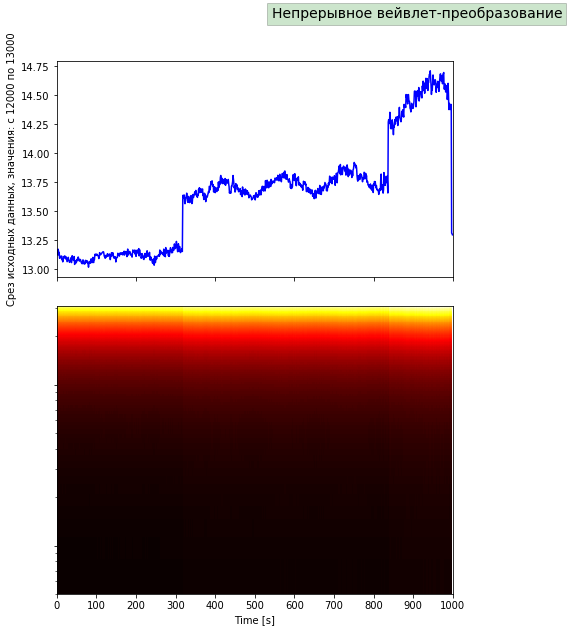

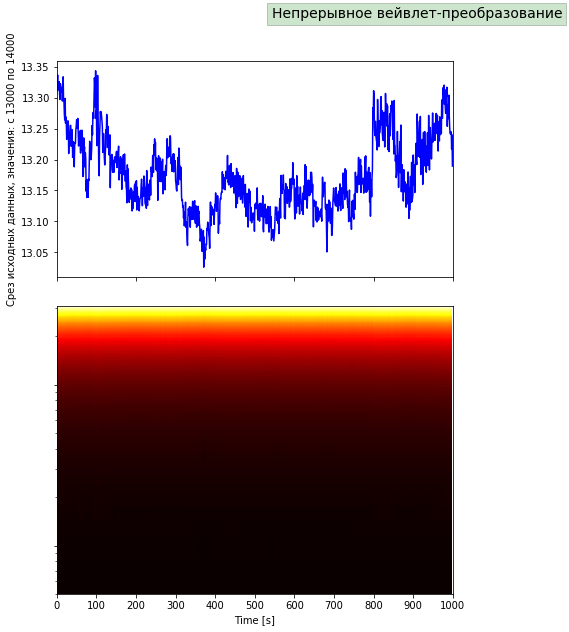

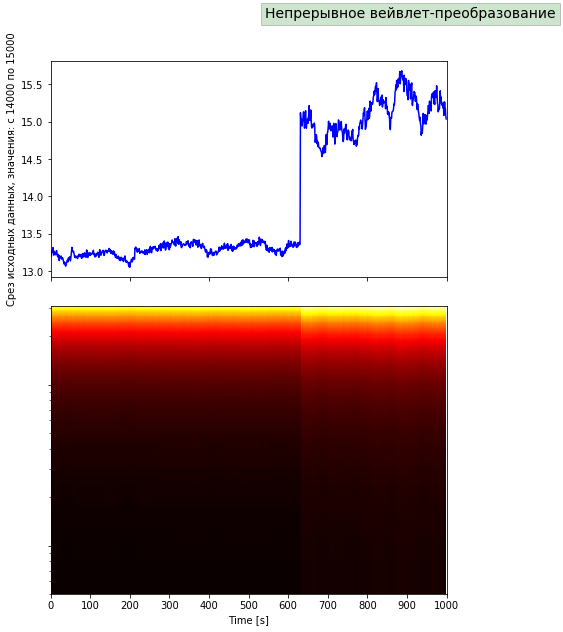

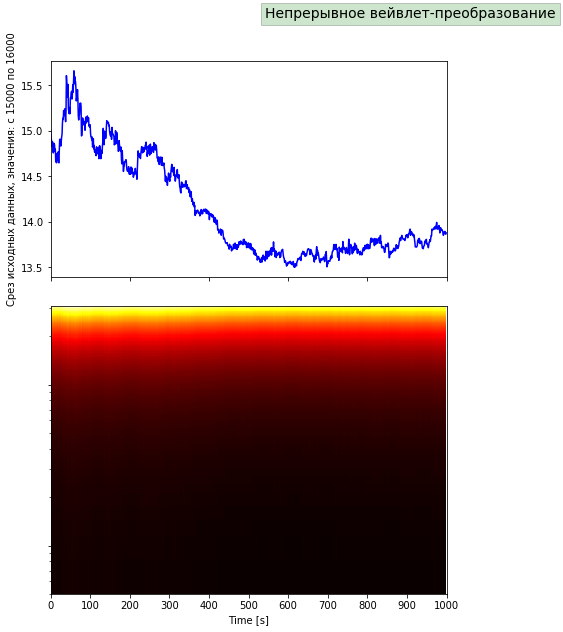

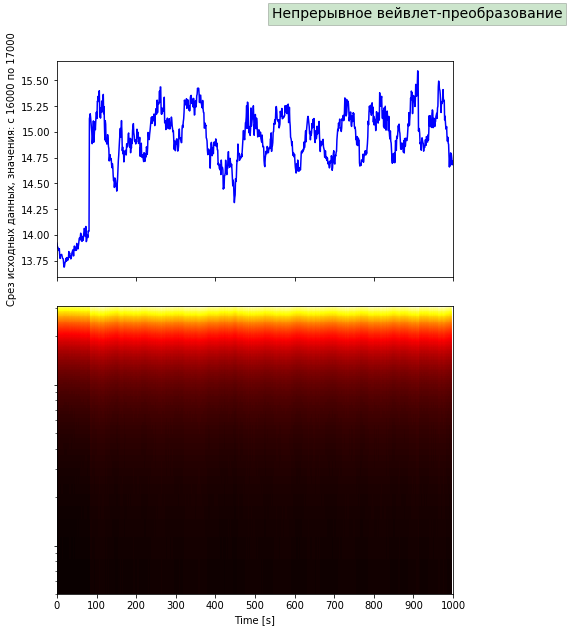

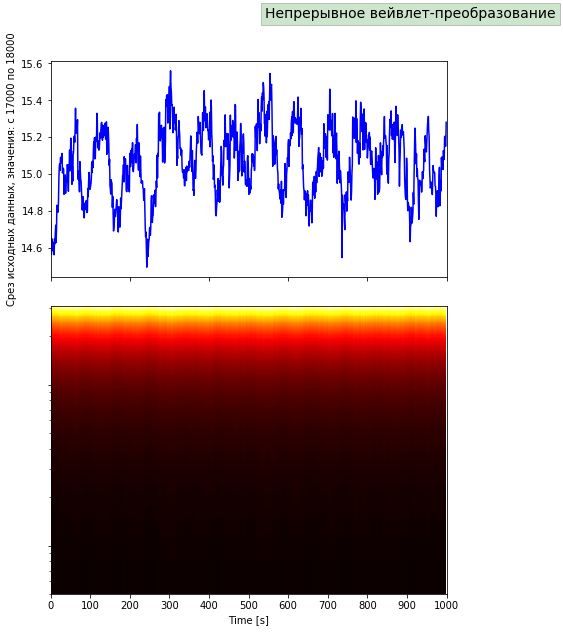

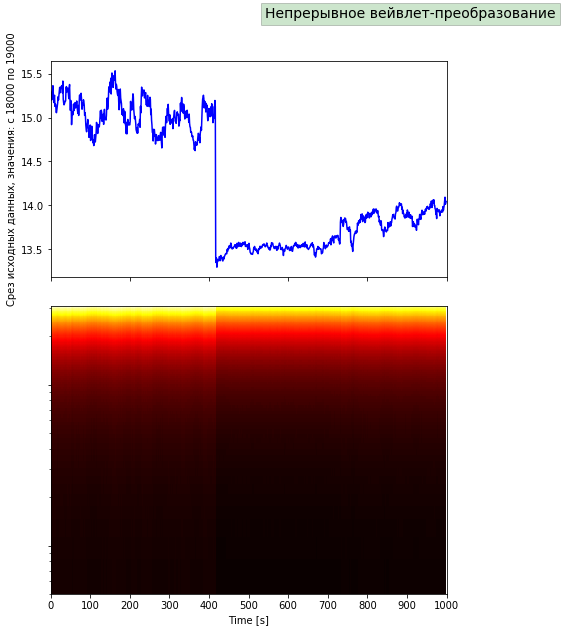

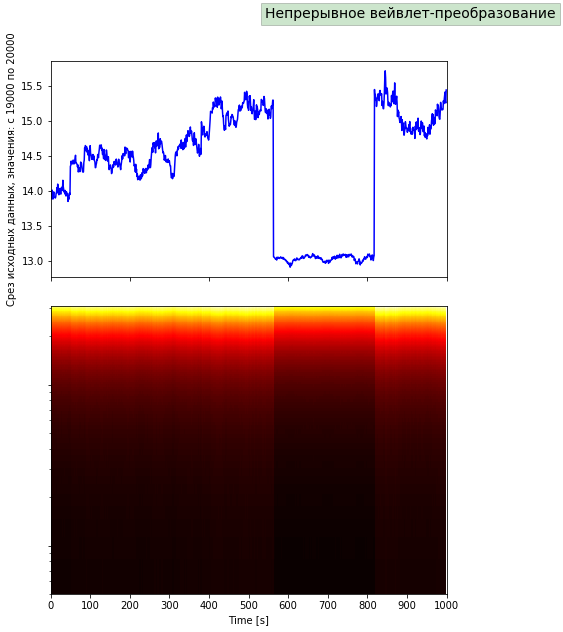

In [20]:
# сигнал с астероида
# проходимся по исходному массиву данных с шагом 1000
# используется вейвлет Морле

step = 1000
Nlo = 0
Nhi = step #?

curr_pos = 0
for index in range(0, round(len(data)/step)):
    A = data.value.values[curr_pos:curr_pos + step]
    cw = wavelet(A, maxscale, notes, scaling = scaling)
    
    scales = cw.getscales()     
    cwt = cw.getdata()
    
    # power spectrum
    pwr = cw.getpower()
    scalespec = np.sum(pwr,axis=1)/scales # calculate scale spectrum
    # scales
    Nhi = len(A)
    y = cw.fourierwl*scales
    x = np.arange(Nlo*1.0,Nhi*1.0,1.0)
    
    
    plots(cwt, curr_pos, curr_pos + step)
    
    curr_pos = curr_pos + step